# Tugas Besar IF2220 Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis

Dibuat oleh : 
* Lyora Felicya (13520073)
* Claudia (13520076)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from IPython.display import Markdown, display
from math import sqrt

print("Data water potability yang digunakan")
col_names = ["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df = pd.read_csv("water_potability.csv", names = col_names)
df

Data water potability yang digunakan


,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


In [9]:
print("Tipe data berupa integer atau float")
df.dtypes

Tipe data berupa integer atau float


id                   int64
pH                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
OrganicCarbon      float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
print("Tidak ada data yang null")
df.isnull().sum()

Tidak ada data yang null


id                 0
pH                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
OrganicCarbon      0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [11]:
print("Berikut merupakan deskripsi statistika untuk semua kolom yang bersifat numerik")

describe_df = df.describe()

# Membuat dictionary
water = {}
water["Kolom"] = []
water["Mean"] = []
water["Median"] = []
water["Modus"] = []
water["Std"] = []
water["Var"] = []
water["Range"] = []
water["Min"] = []
water["Max"] = []
water["Q1"] = []
water["Q2"] = []
water["Q3"] = []
water["IQR"] = []
water["Skew"] = []
water["Kurtosis"] = []

for column in describe_df:
    water["Kolom"].append(column)
    water["Mean"].append(describe_df[column]["mean"])
    water["Median"].append(df.median()[column])
    water["Modus"].append(df.mode("index")[column][0])
    water["Std"].append(describe_df[column]["std"])    
    water["Var"].append(df.var()[column])
    water["Range"].append(describe_df[column]["max"] - describe_df[column]["min"])
    water["Min"].append(describe_df[column]["min"])   
    water["Max"].append(describe_df[column]["max"])    
    water["Q1"].append(describe_df[column]["25%"])   
    water["Q2"].append(describe_df[column]["50%"]) 
    water["Q3"].append(describe_df[column]["75%"])   
    water["IQR"].append(describe_df[column]["75%"] - describe_df[column]["25%"])
    water["Skew"].append(df.skew()[column])
    water["Kurtosis"].append(df.kurtosis()[column])


dataframe_new = pd.DataFrame(water, index = [i for i in range(1,12)])
dataframe_new

Berikut merupakan deskripsi statistika untuk semua kolom yang bersifat numerik


,Kolom,Mean,Median,Modus,Std,Var,Range,Min,Max,Q1,Q2,Q3,IQR,Skew,Kurtosis
1,id,1005.500000,1005.500000,1.000000,580.381340,3.368425e+05,2009.000000,1.000000,2010.000000,503.250000,1005.500000,1507.750000,1004.500000,0.000000,-1.200000
2,pH,7.087193,7.029490,0.227499,1.572803,2.473709e+00,13.772501,0.227499,14.000000,6.090785,7.029490,8.053006,1.962221,0.048535,0.626904
3,Hardness,195.969209,197.203525,73.492234,32.643166,1.065576e+03,243.845890,73.492234,317.338124,176.740657,197.203525,216.447589,39.706932,-0.085321,0.525480
4,Solids,21904.673439,20926.882155,320.942611,8625.397911,7.439749e+07,56167.729801,320.942611,56488.672413,15614.412962,20926.882155,27170.534649,11556.121687,0.591011,0.337320
5,Chloramines,7.134322,7.142014,1.390871,1.585214,2.512904e+00,11.736129,1.390871,13.127000,6.138326,7.142014,8.109933,1.971607,0.013003,0.549782
6,Sulfate,333.211376,332.214113,129.000000,41.211111,1.698356e+03,352.030642,129.000000,481.030642,307.626986,332.214113,359.268147,51.641161,-0.045728,0.786854
7,Conductivity,426.476708,423.438372,201.619737,80.701872,6.512792e+03,551.722883,201.619737,753.342620,366.619219,423.438372,482.209772,115.590553,0.268012,-0.237206
8,OrganicCarbon,14.357940,14.323286,2.200000,3.325770,1.106075e+01,24.806707,2.200000,27.006707,12.122530,14.323286,16.683562,4.561031,-0.020220,0.031018
9,Trihalomethanes,66.400717,66.482041,8.577013,16.081109,2.586021e+02,115.422987,8.577013,124.000000,55.949993,66.482041,77.294613,21.344620,-0.051383,0.223017
10,Turbidity,3.969497,3.967374,1.450000,0.780471,6.091350e-01,5.044749,1.450000,6.494749,3.442882,3.967374,4.514663,1.071781,-0.032266,-0.049831


## Nomor 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

In [24]:
sns.set_theme(style="whitegrid")

***

### id

<AxesSubplot:>

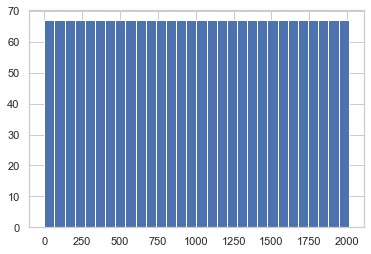

In [41]:
df["id"].hist(bins = 30)

<AxesSubplot:xlabel='id'>

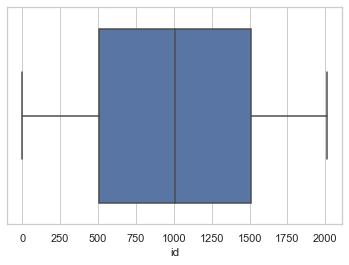

In [29]:
sns.boxplot(x = df["id"])

Distribusi data pada kolom id merupakan distribusi uniform. Hal ini dapat dilihat dari jarak antara maksimum, Q1, median, Q3, dan minimum yang sama rata. Data ini juga memiliki skew 0, sehingga nilai median dan rata-ratanya sama

***

### pH

<AxesSubplot:>

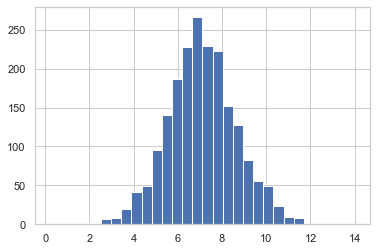

In [62]:
df["pH"].hist(bins = 30)

<AxesSubplot:xlabel='pH'>

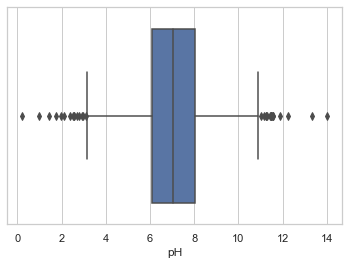

In [63]:
sns.boxplot(x = df["pH"])

Distribusi data pada kolom pH ini terlihat normal. Pada boxplot, terlihat bahwa data ini memiliki pencilan pada kedua sisi. Hal ini sesuai dengan karakteristik data yang terdistribusi normal, yaitu umumnya memiliki 0.35% pencilan pada kedua sisinya. Pada histogram juga terlihat bahwa frekuensi datanya cenderung seimbang antara kiri dan kanan. Data kolom pH ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum".

***

### Hardness

<AxesSubplot:>

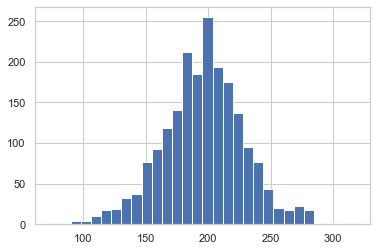

In [43]:
df["Hardness"].hist(bins = 30)

<AxesSubplot:xlabel='Hardness'>

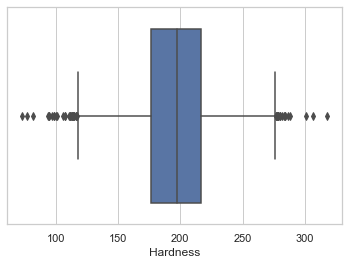

In [26]:
sns.boxplot(x = df["Hardness"])

Distribusi data pada kolom Hardness ini terlihat menyerupai distribusi normal. Pada boxplot, terlihat bahwa data ini memiliki pencilan pada kedua sisi. Hal ini sesuai dengan karakteristik data yang terdistribusi normal, yaitu umumnya memiliki 0.35% pencilan pada kedua sisinya. Pada histogram juga terlihat bahwa frekuensi datanya cenderung seimbang antara kiri dan kanan. Data kolom Hardness ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum".

***

### Solids

<AxesSubplot:>

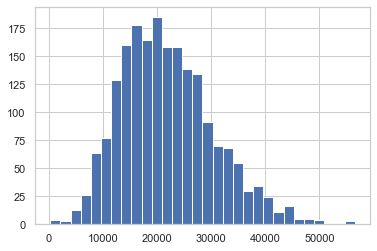

In [44]:
df["Solids"].hist(bins = 30)

<AxesSubplot:xlabel='Solids'>

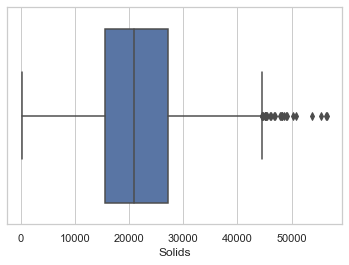

In [25]:
sns.boxplot(x = df["Solids"])

Distribusi data pada kolom Solids ini jauh dari distribusi normal, dan terlihat seperti distribusi half-normal terbalik. Hal ini terlihat dari boxplot, dimana nilai minimum data tidak sama dengan Q1 - 1.5*IQR, serta memiliki pencilan sangat banyak di atas nilai maksimum. Nilai median juga lebih dekat pada minimum, sehingga menggambarkan skew bernilai positif. Pada histogram juga terlihat frekuensi data lebih berat ke kiri.

***

### Chloramines

<AxesSubplot:>

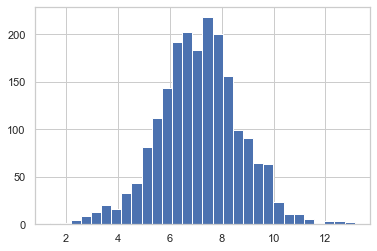

In [40]:
df["Chloramines"].hist(bins = 30)

<AxesSubplot:xlabel='Chloramines'>

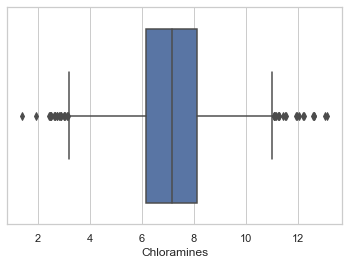

In [31]:
sns.boxplot(x = df["Chloramines"])

Distribusi data pada kolom Chloramines ini menyerupai distribusi normal. Pada boxplot, terlihat bahwa data ini memiliki pencilan pada kedua sisi. Pada histogram juga terlihat bahwa frekuensi datanya cenderung seimbang antara kiri dan kanan. Data kolom Chloramines ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum".

***

### Sulfate

<AxesSubplot:>

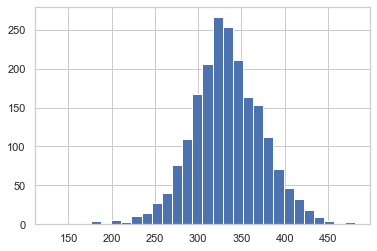

In [45]:
df["Sulfate"].hist(bins = 30)

<AxesSubplot:xlabel='Sulfate'>

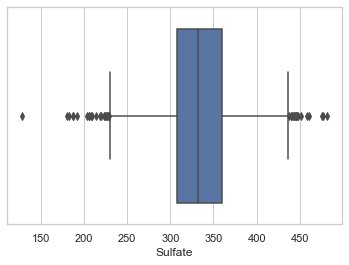

In [46]:
sns.boxplot(x = df["Sulfate"])

Distribusi data pada kolom Sulfate ini terlihat menyerupai distribusi normal. Pada boxplot, terlihat bahwa data ini memiliki pencilan pada kedua sisi, dan terdapat 1 buah pencilan yang bernilai sangat kecil (<150). Pada histogram juga terlihat bahwa datanya menyerupai distribusi normal, dimana frekuensi datanya cenderung seimbang antara kiri dan kanan. 

***

### Conductivity

<AxesSubplot:>

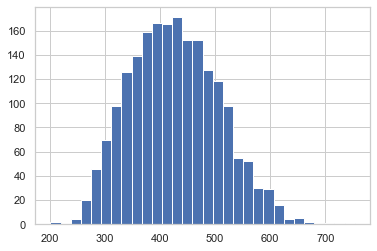

In [50]:
df["Conductivity"].hist(bins = 30)

<AxesSubplot:xlabel='Conductivity'>

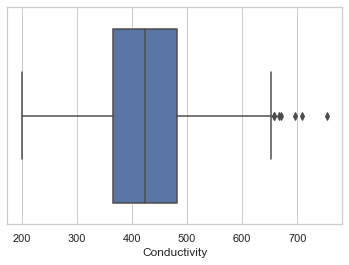

In [47]:
sns.boxplot(x = df["Conductivity"])

Distribusi data pada kolom Conductivity ini jauh dari distribusi normal, dan terlihat seperti distribusi half-normal terbalik. Hal ini terlihat dari boxplot, dimana nilai minimum data tidak sama dengan Q1 - 1.5*IQR, serta memiliki pencilan sangat banyak di atas nilai maksimum dan tidak terdapat pencilan di bawah nilai minimum. Nilai median juga lebih dekat pada minimum, sehingga menggambarkan skew bernilai positif. Pada histogram juga terlihat frekuensi data lebih berat ke kiri dan frekuensinya tidak seimbang antara kiri dan kanan.

***

### OrganicCarbon

<AxesSubplot:>

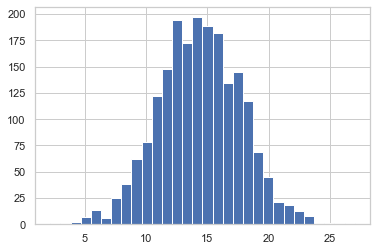

In [52]:
df["OrganicCarbon"].hist(bins = 30)

<AxesSubplot:xlabel='OrganicCarbon'>

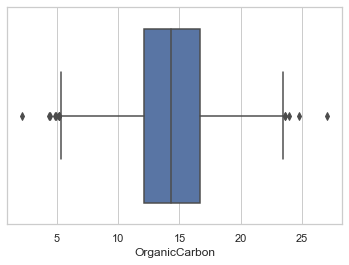

In [53]:
sns.boxplot(x = df["OrganicCarbon"])

Distribusi data pada kolom OrganicCarbon ini dapat dikatakan sebagai distribusi normal. Pada boxplot, terlihat bahwa data ini memiliki pencilan pada kedua sisi. Hal ini sesuai dengan karakteristik data yang terdistribusi normal, yaitu umumnya memiliki 0.35% pencilan pada kedua sisinya. Pada histogram juga terlihat bahwa datanya menyerupai distribusi normal, dimana frekuensi datanya seimbang antara kiri dan kanan. Data kolom OrganicCarbon ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum".

***

### Trihalomethanes

<AxesSubplot:>

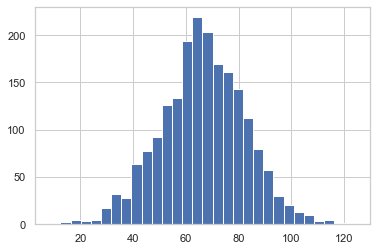

In [54]:
df["Trihalomethanes"].hist(bins = 30)

<AxesSubplot:xlabel='Trihalomethanes'>

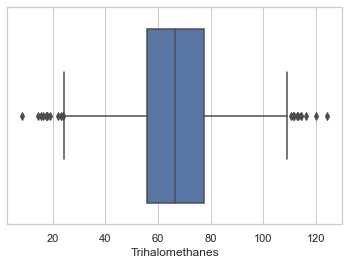

In [55]:
sns.boxplot(x = df["Trihalomethanes"])

Distribusi data pada kolom Trihlomethanes ini dapat dikatakan sebagai distribusi normal. Pada boxplot, terlihat bahwa data ini memiliki pencilan pada kedua sisi. Hal ini sesuai dengan karakteristik data yang terdistribusi normal, yaitu umumnya memiliki 0.35% pencilan pada kedua sisinya.
Pada histogram juga terlihat bahwa datanya menyerupai distribusi normal. Data kolom Trihalomethanes ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum".

***

### Turbidity

<AxesSubplot:>

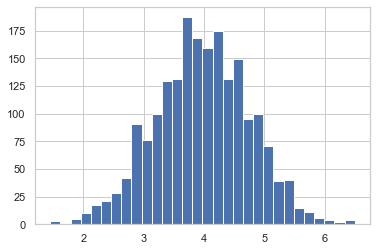

In [56]:
df["Turbidity"].hist(bins = 30)

<AxesSubplot:xlabel='Turbidity'>

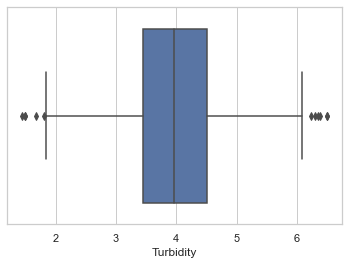

In [57]:
sns.boxplot(x = df["Turbidity"])

Distribusi data pada kolom Turbidity ini dapat dikatakan sebagai distribusi normal. Pada boxplot, terlihat bahwa data ini memiliki pencilan pada kedua sisi. Hal ini sesuai dengan karakteristik data yang terdistribusi normal, yaitu umumnya memiliki 0.35% pencilan pada kedua sisinya.
Pada histogram juga terlihat bahwa datanya menyerupai distribusi normal, dimana frekuensi datanya seimbang antara kiri dan kanan. Data kolom Turbidity ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum".

***

### Potability

<AxesSubplot:>

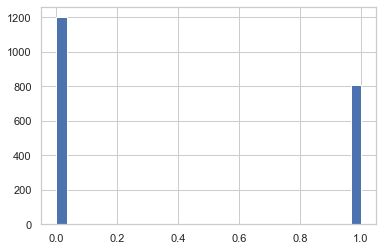

In [59]:
df["Potability"].hist(bins = 30)

<AxesSubplot:xlabel='Potability'>

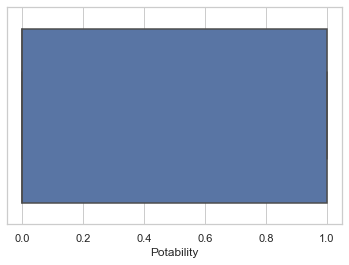

In [60]:
sns.boxplot(x = df["Potability"])

Data pada kolom Potability hanya terdiri atas 2 nilai, yaitu 0 atau 1.

***

## Nomor 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

#### Penjelasan D’Agostino’s and Pearson’s Omnibus Test Of Normality
Normality test dilakukan dengan menggunakan fungsi ```normaltest``` dari library scipy dan akan divisualisaasikan dengan ```seaborn.histplot()```. Apabila hasil tes menyimpulkan kolom berdistribusi normal, maka pada histogram plot akan tergambar bell-shaped curve (kurva simetris).

Tes D'Agostino-Pearson, atau disebut juga Omnibus D'Agostino, dilakukan dengan menggabungkan hasil tes skewness dan kurtosis D'Agostino. Rumusnya diberikan sebagai berikut:$$K^2 = Z_s^2 + Z_k^2$$

$Z_s$ merupakan hasil dari tes Skewness Agostino dan $Z_k$ merupakan hasil tes Kurtosis Agostino. $K^2$ diaproksimasi terdistribusi secara $\chi^2$ (chi-squared) dengan 2 degrees of freedom (derajat kebebasan 2).

Hipotesis null $H_0$ dalam test ini adalah data pada kolom tertentu terdistribusi secara normal.
Apabila nilai $p > \alpha$, maka $H_0$ akan diterima, sehingga kolom dapat disimpulkan memiliki distribusi normal.
Sebaliknya apabila nilai $p \leq \alpha$, maka $H_0$ ditolak, sehingga kolom yang bersangkutan dapat disimpulkan tidak memiliki distribusi normal.

Normality test dibawah ini akan menghasilkan dua buah output, yaitu nilai p-value yang didapat serta kesimpulan apakah hipotesis 0 diterima atau ditolak.

In [8]:
from scipy import stats

def normalityTest(df):
    k2, p = stats.normaltest(df)
    print("P-value dari data ini adalah", p)
    if (p < 0.05):
        print("Karena p-value <= 0.05, maka Hipotesis nol ditolak. Data tidak terdistribusi normal.")
    else:
        print("Karena p-value > 0.05, maka Hipotesis nol diterima. Data terdistribusi normal.")
    sns.histplot(data = df, x = df, kde=True, stat="density", linewidth=0)

### pH

P-value dari data ini adalah 2.6514813346797777e-05
Karena p-value <= 0.05, maka Hipotesis nol ditolak. Data tidak terdistribusi normal.


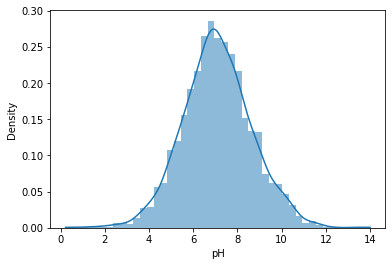

In [9]:
normalityTest(df["pH"])

### Hardness

P-value dari data ini adalah 0.00013442428699593753
Karena p-value <= 0.05, maka Hipotesis nol ditolak. Data tidak terdistribusi normal.


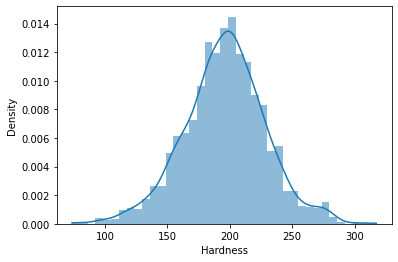

In [10]:
normalityTest(df["Hardness"])

### Solids

P-value dari data ini adalah 2.0796613688739523e-24
Karena p-value <= 0.05, maka Hipotesis nol ditolak. Data tidak terdistribusi normal.


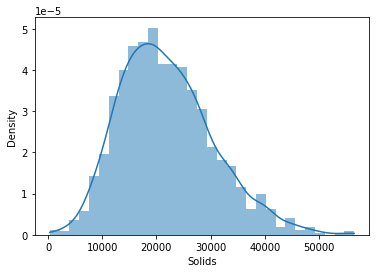

In [11]:
normalityTest(df["Solids"])

### Chloramines

P-value dari data ini adalah 0.0002504831654753917
Karena p-value <= 0.05, maka Hipotesis nol ditolak. Data tidak terdistribusi normal.


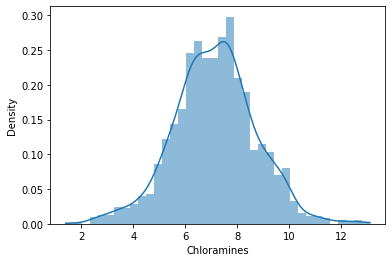

In [12]:
normalityTest(df["Chloramines"])

### Sulfate

P-value dari data ini adalah 4.4255936678013136e-07
Karena p-value <= 0.05, maka Hipotesis nol ditolak. Data tidak terdistribusi normal.


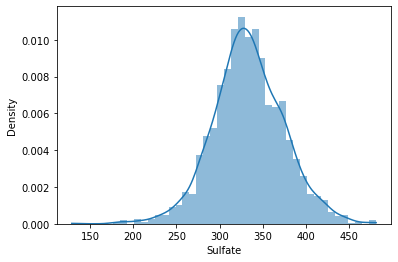

In [13]:
normalityTest(df["Sulfate"])

### Conductivity

P-value dari data ini adalah 4.39018078287845e-07
Karena p-value <= 0.05, maka Hipotesis nol ditolak. Data tidak terdistribusi normal.


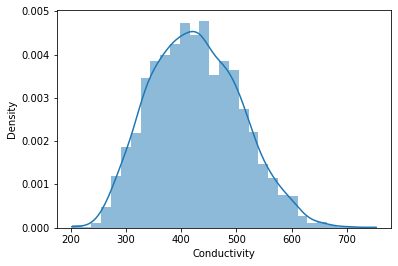

In [14]:
normalityTest(df["Conductivity"])

### OrganicCarbon

P-value dari data ini adalah 0.8825496581408284
Karena p-value > 0.05, maka Hipotesis nol diterima. Data terdistribusi normal.


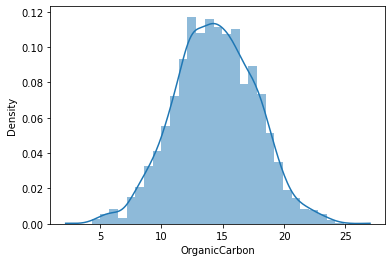

In [15]:
normalityTest(df["OrganicCarbon"])

### Trihalomethanes

P-value dari data ini adalah 0.1043598441875204
Karena p-value > 0.05, maka Hipotesis nol diterima. Data terdistribusi normal.


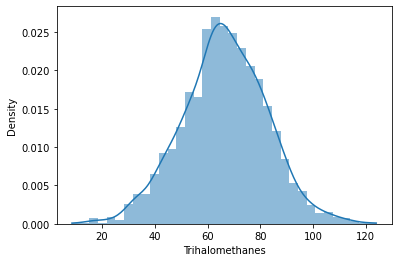

In [16]:
normalityTest(df["Trihalomethanes"])

### Turbidity

P-value dari data ini adalah 0.7694717369961169
Karena p-value > 0.05, maka Hipotesis nol diterima. Data terdistribusi normal.


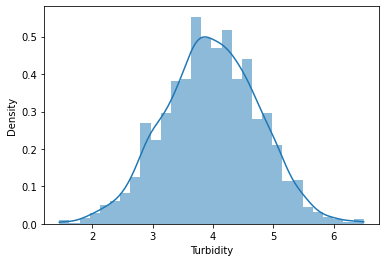

In [17]:
normalityTest(df["Turbidity"])

### Portability

P-value dari data ini adalah 0.0
Karena p-value <= 0.05, maka Hipotesis nol ditolak. Data tidak terdistribusi normal.


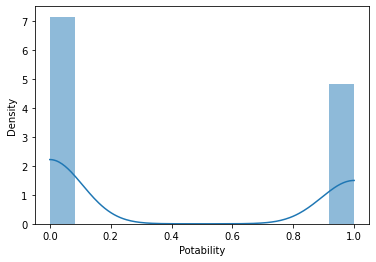

In [18]:
normalityTest(df["Potability"])

## Nomor 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [2]:
import scipy.stats as st

***

a. Nilai Rata-rata pH di atas 7?

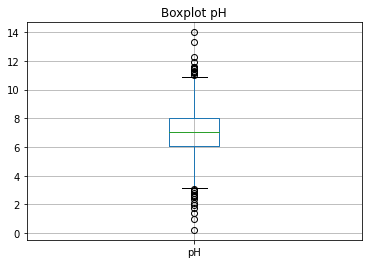

In [82]:
ax = df.boxplot(["pH"])
ax.set_title("Boxplot pH")
plt.show()

1. **Hipotesis nol**

    $H_0 : \mu_{pH} = 7$

2. **Hipotesis alternatif**

    $H_1 : \mu_{pH} > 7$

3. **Tingkat signifikan**

    $\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

    Karena nilai mean dan std populasi diketahui maka uji statistik yang sesuai adalah dengan mengambil nilai 
    $z = \Large\frac{\bar{x}-\mu_0}{\sigma / \sqrt{n}}$ . 
    
    Karena $H_1 : \mu_{pH} > 7$ maka daerah kritisnya adalah $z > z_{\alpha}$, $z > 1.645$  Perhitungan nilai $z_{\alpha}$ dapat dilihat pada kode dibawah ini.

In [5]:
z_a = st.norm.ppf(.95)
print("z_a = ",z_a)

z_a =  1.6448536269514722


5. **Perhitungan uji statistik dan $p$-value**

    Berdasarkan statistik yang didapat pada jawaban nomor 1, didapatkan nilai $\sigma, \, \bar{x}, \, n$. 
    Nilai $p$-value dihitung berdasarkan nilai uji statistik $z$.

    $z = \Large\frac{\bar{x}-\mu_0}{\sigma / \sqrt{n}}, \, \normalsize\bar{x} = 7.08719, \, \sigma = 1.57280, \, n = 2010$

    $z = \Large\frac{7.08719 - 7}{1.57280/\sqrt{2010}}$ = 2.485

    Perhitungan nilai z dan p-value dapat dilihat pada cuplikan kode dibawah ini :

In [6]:
# Menghitung nilai rata-rata, std, m_0, dan n
mu_0 = 7
mean = df["pH"].mean()
std = df["pH"].std()
n = len(df["pH"])
print("xbar =", mean, ", std =", std, ", n =", n, ", mu_0 =", mu_0)

# Menghitung nilai z
z = (mean - mu_0)/(std/(n**0.5))
print("z =",z)

# Menghitung p-value
p = st.norm.sf(abs(z))
print("p-value =", p)

xbar = 7.0871927687138285 , std = 1.5728029470456655 , n = 2010 , mu_0 = 7
z = 2.485445147379887
p-value = 0.006469476288896462


6. **Keputusan**

    $H_0$ ditolak jika nilai uji terletak di daerah kritis, dan jika p-value < $\alpha$ (0.05). 
    
    Karena p-value yang didapat lebih kecil dari $\alpha$ (0.006469 < 0.05) dan berada di dalam daerah kritis $z > 1.645$, dengan nilai $z = 2.485$, maka diambil keputusan hipotesis nol ($H_0 : \mu = 7$) **ditolak**. Nilai rata-rata pH lebih dari 7.

***

b. Nilai Rata-rata Hardness tidak sama dengan 205?

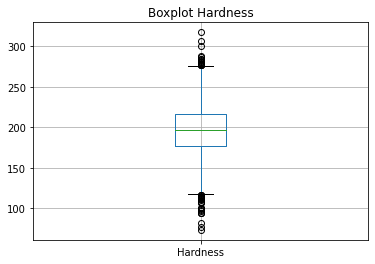

In [84]:
ax = df.boxplot(["Hardness"])
ax.set_title("Boxplot Hardness")
plt.show()

1. **Hipotesis nol**

    $H_0 : \mu_{Hardness} = 205$

2. **Hipotesis alternatif**

    $H_1 : \mu_{Hardness} \neq 205$

3. **Tingkat signifikan**

    $\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

    Dengan mengasumsikan kolom data Hardness mengikuti distribusi normal, penentuan daerah kritis dapat dilihat dari tabel distribusi normal. Karena nilai mean dan std populasi diketahui, maka penentuan uji statistik dilakukan dengan mengambil nilai z

    $z = \Large\frac{\bar{x}-\mu_0}{\sigma / \sqrt{n}}$

    Serta karena $H_1 : \mu_{Hardness} \neq 205$, maka daerah kritisnya terletak pada $z > z_{a/2}$ atau $z < -z_{a/2}$, yaitu pada $z > 1.96$ atau $z < -1.96$. Perhitungan nilai $z_{a/2}$ dapat dilihat dari kode dibawah ini.

In [31]:
z_adiv2 = st.norm.ppf(.975)
print("z_a/2 =",z_adiv2)

z_a/2 = 1.959963984540054


5. **Perhitungan uji statistik dan $p$-value**

    Berdasarkan statistik yang didapat pada jawaban nomor 1, didapatkan nilai $\sigma, \, \bar{x}, \, n$. 
    Nilai $p$-value dihitung berdasarkan nilai uji statistik $z$.

    $z = \Large\frac{\bar{x}-\mu_0}{\sigma / \sqrt{n}}, \, \normalsize\bar{x} = 195.96920, \, \sigma = 32.64317, \, n = 2010$

    $z = \Large\frac{7.08719 - 205}{1.57280/\sqrt{2010}}$ = -12.403137170010732

    Perhitungan nilai z dan p-value dapat dilihat pada cuplikan kode dibawah ini :

In [7]:
# Menghitung nilai rata-rata, std, m_0, dan n
mu_0 = 205
mean = df["Hardness"].mean()
std = df["Hardness"].std()
n = len(df["Hardness"])
print("xbar =", mean, ", std =", std, ", n =", n, ", mu_0 =", mu_0)

# Menghitung nilai z
z = (mean - mu_0)/(std/(n**0.5))
print("z =",z)

# Menghitung p-value dengan two tailed test
p = st.norm.sf(abs(z))*2
print("p-value =", p)

xbar = 195.96920903783524 , std = 32.643165859429864 , n = 2010 , mu_0 = 205
z = -12.403137170010732
p-value = 2.5128904895144654e-35


6. **Keputusan**

    $H_0$ ditolak jika p-value lebih kecil dari nilai signifikan $\alpha$ atau terletak di daerah kritis.
    
    Karena p-value yang didapat lebih kecil dari alpha (2.5128904895144654e-35 < 0.05), dan nilai z = -12.4 berada di dalam daerah kritis $z < -z_{a/2}$, maka diambil keputusan hipotesis nol ($H_0 : \mu_{Hardness} = 205$) **ditolak**. Nilai rata-rata data pada kolom hardness tidak sama dengan 205.

***

c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

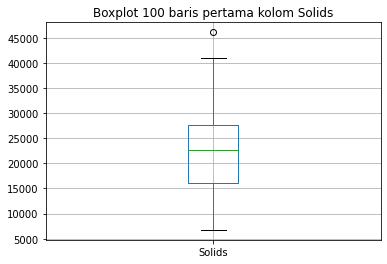

In [86]:
ax = df.loc[:99].boxplot(["Solids"])
ax.set_title("Boxplot 100 baris pertama kolom Solids")
plt.show()

1. **Hipotesis nol**

    $H_0 : \mu_{100\, baris\, pertama\, kolom\, Solids} = 21900$

2. **Hipotesis alternatif**

    $H_1 : \mu_{100\, baris\, pertama\, kolom\, Solids} \neq 21900$


3. **Tingkat signifikan**

    $\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

    Karena nilai std populasi data pada kolom Solids tidak diketahui, maka penentuan uji statistik dilakukan dengan mengambil nilai $t = \Large\frac{\bar{x}-\mu_0}{s / \sqrt{n}}$. 
    
    Daerah kritis nya terletak pada $t > t_{a/2}$ atau $t < -t_{a/2}$. Jadi $t > 1.66 $ atau $t < -1.66$ .Perhitungan nilai $t_{a/2}$ dapat dilihat dari kode dibawah ini.

5. **Perhitungan uji statistik dan $p$-value**

    Berdasarkan statistik yang didapat pada jawaban nomor 1, didapatkan nilai $\sigma, \, \bar{x}, \, n$. 
    Nilai $p$-value dihitung berdasarkan nilai uji statistik $z$.

    $t = \Large\frac{\bar{x}-\mu_0}{\sigma / \sqrt{n}}, \, \normalsize\bar{x} = 22347.33445, \, \sigma = 32.64317, \, n = 100$

    $t = \Large\frac{22347.33445 - 21900}{32.64317/\sqrt{100}}$

    Perhitungan nilai z dan p-value dapat dilihat pada cuplikan kode dibawah ini :

In [9]:
# Derajat kebebasan = n - 1 = 100 - 1 = 99
v = 99
t_adiv2 = st.t.ppf(.95, v)
print("Derajat kebebasan =", v)
print("t_a/2 =",t_adiv2)

Derajat kebebasan = 99
t_a/2 = 1.6603911559963895


5. **Perhitungan uji statistik dan $p$-value**

    Berdasarkan statistik yang didapat pada jawaban nomor 1, didapatkan nilai $\sigma, \, \bar{x}, \, n$. 
    Nilai $p$-value dihitung berdasarkan nilai uji statistik $z$.

    $t = \Large\frac{\bar{x}-\mu_0}{s / \sqrt{n}}, \, \normalsize\bar{x} = 22347.33445, \, s = 7935.9677, \, n = 100$

    $t = {\Large\frac{22347.33445 - 21900}{7935.9677/\sqrt{100}}} = 0.5637$

    Perhitungan nilai z dan p-value dapat dilihat pada cuplikan kode dibawah ini :

In [10]:
# Menghitung nilai rata-rata, std, m_0, dan n
mu_0 = 21900
mean = df["Solids"][:100].mean()
s = df["Solids"][:100].std()
n = 100
print("xbar =", mean, ", s =", s, ", n =", n, ", mu_0 =", mu_0)

# Menghitung nilai z
t = (mean - mu_0)/(s/(n**0.5))
print("t =",t)

# Menghitung p-value
v = 99
p = 2*(1-st.t.cdf(t, v))
print("p-value =", p)

xbar = 22347.334446383426 , s = 7935.967706199006 , n = 100 , mu_0 = 21900
t = 0.5636797715721551
p-value = 0.5742467134052605


6. **Keputusan**
    
    Karena p-value yang didapat lebih besar dari $\alpha$ (0.574 > 0.05), dan nilai t = 0.564 tidak berada di daerah kritis $t > 1.66 $ atau $t < -1.66$ maka diambil keputusan hipotesis nol ($H_0 : \mu_{100\, baris\, pertama\, kolom\, Solids} = 21900$) **diterima**. Nilai rata-rata 100 baris pertama kolom Solids bernilai 21900.

***

d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

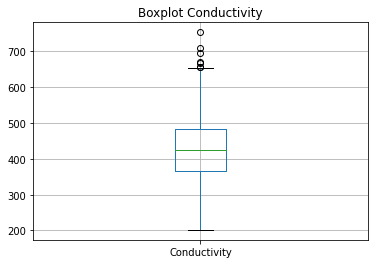

In [88]:
ax = df.boxplot(["Conductivity"])
ax.set_title("Boxplot Conductivity")
plt.show()

1. **Hipotesis nol**

    $X$ = variabel random Conductivity.

    $H_0 : P(X > 450) = 0.10$

2. **Hipotesis alternatif**

    $H_1 : P(X > 450) \neq 0.10$


3. **Tingkat signifikan**

    $\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

    Karena nilai mean dan std populasi diketahui, maka penentuan uji statistik dapat dilakukan dengan mengambil nilai 
    
    $z = \Large\frac{x - (n \times p_{0})}{\sqrt{p_{0} \times q_{0} \times n}}$. 
    
    Karena $H_1$ adalah $P(X > 450) \neq 0.10$, maka daerah kritisnya terletak pada $z > z_{a/2}$ atau $z < -z_{a/2}$, $z > 1.96$ atau $z < -1.96$. 
    
    Daerah kritisnya adalah $z > 1.96$ atau $z < -1.96$. Perhitungan nilai $z_{a/2}$ dapat diilihat pada kode dibawah ini.

In [11]:
# Menghitung nilai Z_a/2
z_adiv2 = st.norm.ppf(.975)
print("z_a/2 =",z_adiv2)

z_a/2 = 1.959963984540054


5. **Perhitungan uji statistik dan $p$-value**

    Perhitungan uji statistik dan $p$-value dapat dilihat pada kode dibawah ini.

In [12]:
# Mencari nilai p0, q0, dan x dari data Conductivity yang niainya lebih besar dari 450
x = 0
n = len(df["Conductivity"])
for i in range (n):
    if(df["Conductivity"][i] > 450):
        x += 1
p0 = 0.10
q0 = 1 - p0
print("x =", x, ", p0 =", p0, ", q0 =", q0)

# Menghitung nilai Z
z = (x - n*p0)/((n*p0*q0)**0.5)
print("z =",z)

# Menghitung nilai p value dengan two-tailed test
p = st.norm.sf(abs(z))*2
print("p-value =", p)

x = 745 , p0 = 0.1 , q0 = 0.9
z = 40.446376131589325
p-value = 0.0


6. **Keputusan**

    $H_0$ ditolak jika nilai uji terletak di daerah kritis, atau jika p-value < $\alpha$ (0.05). 
    
    Karena p-value yang didapat lebih kecil dari $\alpha$ (0 < 0.05) dan nilai z = 40.45 berada di dalam daerah kritis $z > 1.96$ atau $z < -1.96$, maka diambil keputusan hipotesis nol ($H_0 : P(X > 450) = 0.10$) **ditolak**. Proporsi nilai Conductivity yang lebih dari 450, tidak sama dengan 10%.

e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

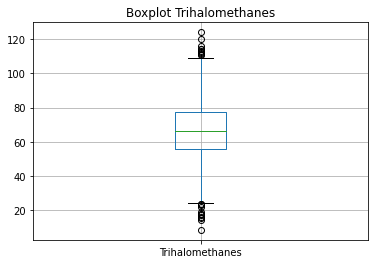

In [90]:
ax = df.boxplot(["Trihalomethanes"])
ax.set_title("Boxplot Trihalomethanes")
plt.show()

1. **Hipotesis nol**

    $X$ = variabel random Trihalomethanes.

    $H_0 : P(X < 40) = 0.05$

2. **Hipotesis alternatif**

    $H_1 : P(X < 40) < 0.05$

3. **Tingkat signifikan**

    $\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

    Karena nilai mean dan std populasi diketahui, maka penentuan uji statistik dapat dilakukan dengan mengambil nilai 
    
    $z = \Large\frac{x - (n \times p_{0})}{\sqrt{p_{0} \times q_{0} \times n}}$. 
    
    Karena $H_1$ adalah $H_1 : P < 0.05$, maka daerah kritisnya terletak pada $z < -z_{a/2}$, $z < -1.64$  Perhitungan nilai $z_{a/2}$ dapat dilihat pada kode dibawah ini.


In [13]:
# Menghitung nilai Z_a
z_a = st.norm.ppf(.95)
print("z_a =",z_a)

z_a = 1.6448536269514722


5. **Perhitungan uji statistik dan $p$-value**

    Perhitungan uji statistik dan $p$-value dapat dilihat pada kode dibawah ini.

In [14]:
# Menghitung x, p0, dan q0 untuk data Trihalomethanes
x = 0
n = len(df["Trihalomethanes"])
for i in range (n):
    if(df["Trihalomethanes"][i] < 40):
        x += 1
p0 = 0.05
q0 = 1 - p0
print("x =", x, ", p0 =", p0, ", q0 =", q0)

# Menghitung nilai z
z = (x - n*p0)/((n*p0*q0)**0.5)
print("z =",z)

# Menghitung p value dengan one-tailed test
p = st.norm.sf(abs(z))
print("p-value =", p)

x = 106 , p0 = 0.05 , q0 = 0.95
z = 0.5628826416670959
p-value = 0.2867574004907627


6. **Keputusan**

    Karena nilai p value yang didapatkan lebih besar dari $\alpha$, dimana 0.287 > 0.05 dan nilai z = 0.563 tidak terletak di dalam daerah kritis $z > 1.64$ atau $z < -1.64$, maka diambil keputusan hipotesis nol ($H_0 : P(X < 40) = 0.05$) **diterima**. Proporsi nilai Trihalomethanes yang kurang dari 40 adalah 5%

## Nomor 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?


$A_1$: Data bagian awal kolom Sulfate

$A_2$: Data bagian akhir kolom Sulfate

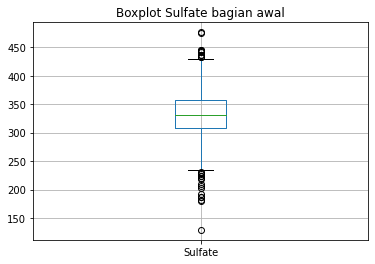

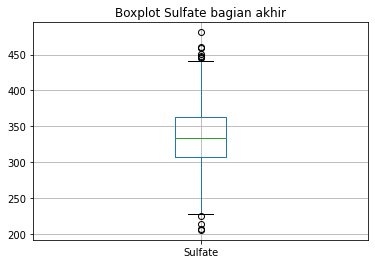

In [30]:
ax = df.loc[:1004].boxplot(["Sulfate"])
ax.set_title("Boxplot Sulfate bagian awal")
plt.show()

bx = df.loc[1005:].boxplot(["Sulfate"])
bx.set_title("Boxplot Sulfate bagian akhir")
plt.show()

1. Menentukan hipotesis nol $H_0$

$H_0$: $\mu_{A_1} = \mu_{A_2}$

Hipotesis nol yaitu rata-rata bagian awal kolom Sulfate sama dengan rata-rata bagian akhir kolom Sulfate.

2. Menentukan hipotesis alternatif $H_1$

$H_1$: $\mu_{A_1} \neq \mu_{A_2}$

Hipotesis alternatif yaitu rata-rata bagian awal kolom Sulfate tidak sama dengan rata-rata bagian akhir kolom Sulfate yang artinya rata-rata $A_1$ dapat lebih besar atau lebih kecil dari rata-rata $A_2$ (two-tailed test).

3. Menentukan Tingkat Signifikansi $\alpha$

Tingkat signifikansi yang diambil adalah $\alpha = 0.05$

4. Menentukan tes/uji statistik dengan menggunakan t-distribution dan mencari daerah kritis.

Daerah kritisnya dapat ditentukan dengan:

$$ t < -t_{\alpha/2}(v) \quad or \quad t > t_{\alpha/2}(v)$$ 
$n_{A_1} = 1005$, $n_{A_2} = 1005$

Derajat kebebasan $(v)$ $= v_{A_1} + v_{A_2} = (n_{A_1} - 1) + (n_{A_2} - 1) = n_{A_1} + n_{A_2} - 2$

$v = 1005 + 1005 - 2 = 2008$

In [31]:
batas = t.ppf(0.025, 2008)
batas_bawah = round(batas, 5)
batas_atas = round(-batas, 5)

display(Markdown(("#### Daerah kritis adalah t < " + str(batas_bawah) + " atau t > " + str(batas_atas))))

#### Daerah kritis adalah t < -1.96115 atau t > 1.96115

5. Menentukan nilai uji statistik dan p-value

Nilai t dapat ditentukan dengan menggunakan rumus:

Nilai $t$ harus berada di luar daerah kritis supaya $H_0$ diterima. Rumus $t$ diberikan sebagai berikut:
$$\Large t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{s_1^2}{\Large n_{1}} + \Large\frac{s_2^2}{\Large n_{2}}}}$$
$\bar{X_1}$ : rata-rata sampel $A_1$, $\bar{X_2}$ : rata-rata sampel $A_2$

$\mu_1$ : rata-rata populasi $A_1$, $\mu_2$ : rata-rata populasi $A_2$

$S_1^2$ : variansi sampel $A_1$, $S_2^2$ : variansi sampel $A_2$

Karena dari $H_0$, $\mu_{A_1} = \mu_{A_2}$ maka $\mu_{A_1} - \mu_{A_2} = 0$.


In [37]:
x1 = df.loc[:1005, "Sulfate"].mean() #masihragu
x2 = df.loc[1005:, "Sulfate"].mean()
s1 = df.loc[:1005, "Sulfate"].var()
s2 = df.loc[1005:, "Sulfate"].var()

t_val = ((x1 - x2) - 0 )/ sqrt((s1/1005) + (s2/1005))
p_val= 1 - t.cdf(t_val, 2008)

display(Markdown("### Nilai t adalah " + str(round(t_val, 5))))
display(Markdown("### Nilai p-value adalah " + str(round(p_val, 5))))

### Nilai t adalah -2.0556

### Nilai p-value adalah 0.98003

6. Pengambilan keputusan

Keputusan diambil dengan membandingkan nilai t berada di luar atau dalam daerah kritis.
Agar $H_0$ diterima, nilai $t$ harus berada di luar daerah kritis. 

Dari perhitungan didapat bahwa $t = -2.0556$, $t < -1.96115$ (berada di dalam daerah  kritis) sehingga kesimpulannya adalah **H0 ditolak** dan **H1 diterima** yaitu rata-rata data bagian awal kolom OrganicCarbon tidaksama dengan rata-rata data bbagian akhir kolom OrganicCarbon ditambah 0.15

### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

$A_1$: Data bagian awal kolom OrganicCarbon

$A_2$: Data bagian akhir kolom OrganicCarbon

Berikut merupakan Boxplot dari A1 dan A2

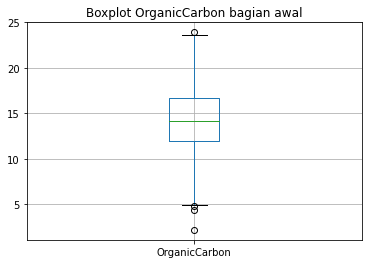

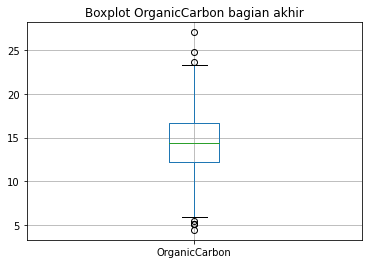

In [12]:
ax = df.loc[:1004].boxplot(["OrganicCarbon"])
ax.set_title("Boxplot OrganicCarbon bagian awal")
plt.show()

bx = df.loc[1005:].boxplot(["OrganicCarbon"])
bx.set_title("Boxplot OrganicCarbon bagian akhir")
plt.show()

1. Menentukan hipotesis nol $H_0$

$H_0$: $\mu_{A_1} = (\mu_{A_2} + 0.15)$

Hipotesis nol yaitu rata-rata data bagian awal kolom OrganicCarbon sama dengan rata-rata data bagian akhir kolom OrganicCarbon ditambah $0.15$.

2. Menentukan hipotesis alternatif $H_1$

$H_1$: $\mu_{A_1} \neq (\mu_{A_2} + 0.15)$

Hipotesis alternatif yaitu rata-rata data bagian awal kolom OrganicCarbon tidak sama dengan rata-rata data bagian akhir kolom OrganicCarbon ditambah $0.15$ yang artinya rata-rata $A_1$ dapat lebih besar atau lebih kecil dari rata-rata $A_2$ ditambah $0.15$ (two-tailed test)

3. Menentukan Tingkat Signifikansi $\alpha$

Tingkat signifikansi yang diambil adalah $\alpha = 0.05$

4. Menentukan tes/uji statistik dengan menggunakan t-distribution dan mencari daerah kritis.

Daerah kritisnya dapat ditentukan dengan

$$ t < -t_{\alpha/2}(v) \quad or \quad t > t_{\alpha/2}(v)$$ 
$v =$ derajat kebebasan $= n_{A_1} + n_{A_2} - 2$

$n_{A_1} = 1005$, $n_{A_2} = 1005$

Derajat kebebasan $(v)$ $= v_{A_1} + v_{A_2} = (n_{A_1} - 1) + (n_{A_2} - 1) = n_{A_1} + n_{A_2} - 2$

$v = 1005 + 1005 - 2 = 2008$

Cari batasan daerah kritis dengan bantuan modul ```scipy.stats```:

In [15]:
batas = t.ppf(0.025, 2008)
batas_bawah = round(batas, 5)
batas_atas = round(-batas, 5)

display(Markdown(("#### Daerah kritis adalah t < " + str(batas_bawah) + " atau t > " + str(batas_atas))))

#### Daerah kritis adalah t < -1.96115 atau t > 1.96115

5. Menentukan nilai uji statistik dan p-value

Nilai t dapat ditentukan dengan menggunakan rumus:

Nilai $t$ harus berada di luar daerah kritis supaya $H_0$ diterima. Rumus $t$ diberikan sebagai berikut:
$$\Large t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{s_1^2}{\Large n_{1}} + \Large\frac{s_2^2}{\Large n_{2}}}}$$
$\bar{X_1}$ : rata-rata sampel $A_1$, $\bar{X_2}$ : rata-rata sampel $A_2$

$\mu_1$ : rata-rata populasi $A_1$, $\mu_2$ : rata-rata populasi $A_2$

$S_1^2$ : variansi sampel $A_1$, $S_2^2$ : variansi sampel $A_2$

Karena dari $H_0$, $\mu_{A_1} = \mu_{A_2} + 0.15$ maka $\mu_{A_1} - \mu_{A_2} = 0.15$.


In [36]:
x1 = df.loc[:1005, "OrganicCarbon"].mean() #masihragu
x2 = df.loc[1005:, "OrganicCarbon"].mean()
s1 = df.loc[:1005, "OrganicCarbon"].var()
s2 = df.loc[1005:, "OrganicCarbon"].var()

t_val = ((x1 - x2) - 0.15) / sqrt((s1/1005) + (s2/1005))
p_val= 1 - t.cdf(t_val, 2008)

display(Markdown("### Nilai t adalah " + str(round(t_val, 5))))
display(Markdown("### Nilai p-value adalah " + str(round(p_val, 5))))

### Nilai t adalah -2.42486

### Nilai p-value adalah 0.9923

6. Pengambilan keputusan

Keputusan diambil dengan membandingkan nilai t berada di luar atau dalam daerah kritis.
Agar $H_0$ diterima, nilai $t$ harus berada di luar daerah kritis. 

Dari perhitungan didapat bahwa $t = -2.42486$, $t < -1.96115$ (berada di dalam daerah  kritis) sehingga kesimpulannya adalah **H0 ditolak** dan **H1 diterima** yaitu rata-rata data bagian awal kolom OrganicCarbon tidak sama dengan rata-rata data bagian akhir kolom OrganicCarbon ditambah 0.15

### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?


$A_1$: Data 100 baris pertama kolom Chloramines

$A_2$: Data 100 baris terakhir kolom Chloramines

Berikut merupakan Boxplot dari A1 dan A2


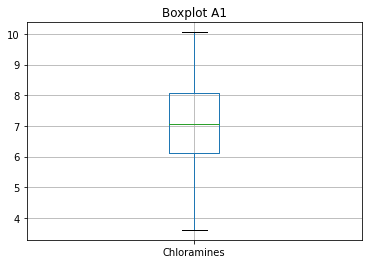

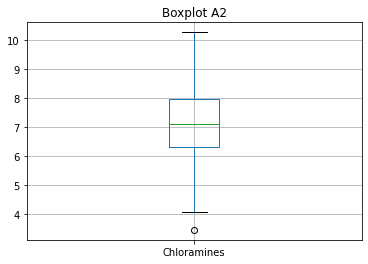

In [6]:
ax = df.loc[:100].boxplot(["Chloramines"])
ax.set_title("Boxplot A1")
plt.show()

bx = df.loc[1910:].boxplot(["Chloramines"])
bx.set_title("Boxplot A2")
plt.show()

1. Menentukan hipotesis nol $H_0$

$H_0$: $\mu_{A_1} = \mu_{A_2}$

Hipotesis nol yaitu rata-rata 100 baris pertama kolom Chloramines sama dengan rata-rata 100 baris terakhir kolom Chloramines.

2. Menentukan hipotesis alternatif $H_1$

$H_1$: $\mu_{A_1} \neq \mu_{A_2}$

Hipotesis alternatif yaitu rata-rata 100 baris pertama kolom Chloramines tidak sama dengan rata-rata 100 baris terakhir kolom Chloramines yang artinya rata-rata $A_1$ dapat lebih besar atau lebih kecil dari rata-rata $A_2$ (two-tailed test).

3. Menentukan Tingkat Signifikansi $\alpha$

Tingkat signifikansi yang diambil adalah $\alpha = 0.05$

4. Menentukan tes/uji statistik dengan menggunakan t-distribution dan mencari daerah kritis.

Daerah kritisnya dapat ditentukan dengan:

$$ t < -t_{\alpha/2}(v) \quad or \quad t > t_{\alpha/2}(v)$$ 
$n_{A_1} = 100$, $n_{A_2} = 100$

Derajat kebebasan $(v)$ $= v_{A_1} + v_{A_2} = (n_{A_1} - 1) + (n_{A_2} - 1) = n_{A_1} + n_{A_2} - 2$

$v = 100 + 100 - 2 = 198$


In [16]:
batas = t.ppf(0.025, 198)
batas_bawah = round(batas, 5)
batas_atas = round(-batas, 5)

display(Markdown(("#### Daerah kritis adalah t < " + str(batas_bawah) + " atau t > " + str(batas_atas))))

#### Daerah kritis adalah t < -1.97202 atau t > 1.97202

5. Menentukan nilai uji statistik dan p-value

Nilai t dapat ditentukan dengan menggunakan rumus:

Nilai $t$ harus berada di luar daerah kritis supaya $H_0$ diterima. Rumus $t$ diberikan sebagai berikut:
$$\Large t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{s_1^2}{\Large n_{1}} + \Large\frac{s_2^2}{\Large n_{2}}}}$$
$\bar{X_1}$ : rata-rata sampel $A_1$, $\bar{X_2}$ : rata-rata sampel $A_2$

$\mu_1$ : rata-rata populasi $A_1$, $\mu_2$ : rata-rata populasi $A_2$

$S_1^2$ : variansi sampel $A_1$, $S_2^2$ : variansi sampel $A_2$

Karena dari $H_0$, $\mu_{A_1} = \mu_{A_2}$ maka $\mu_{A_1} - \mu_{A_2} = 0$.


In [18]:
x1 = df.loc[:100, "Chloramines"].mean()
x2 = df.loc[1910:, "Chloramines"].mean()
s1 = df.loc[:100, "Chloramines"].var()
s2 = df.loc[1910:, "Chloramines"].var()

t_val = ((x1 - x2) - 0)/ sqrt((s1/100) + (s2/100))
p_val = 1 - t.cdf(t_val, 198)

display(Markdown("### Nilai t adalah " + str(round(t_val, 5))))
display(Markdown("### Nilai p-value adalah " + str(round(p_val, 5))))


### Nilai t adalah -0.70998

### Nilai p-value adalah 0.76072

6. Pengambilan keputusan

Keputusan diambil dengan membandingkan nilai t berada di luar atau dalam daerah kritis.
Agar $H_0$ diterima, nilai $t$ harus berada di luar daerah kritis. 

Dari perhitungan didapat bahwa $t = -0.70999$, $t > -1.97202$ dan $t < 1.97202$ (berada di luar daerah  kritis) sehingga kesimpulannya adalah **H0 diterima** yaitu rata-rata 100 baris pertama kolom Chloramines sama dengan rata-rata 100 baris terakhirnya.

### d.  Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

## Nomor 6
Menentukan apakah setiap kolom non-target berkorelasi dengan kolom target dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Untuk menentukan korelasi antara dua kolom, digunakan koefisien korelasi Pearson dengan rumus:
$$ r = \frac{\sigma_{xy}}{\sigma_x \sigma_y} = \frac{n\sum xy - (\sum x)(\sum y)}{\sqrt{(n\sum x^2 - (\sum x)^2)(n\sum y^2 - (\sum y)^2)}}$$ 
dengan X adalah kolom target dan Y adalah kolom non-target

Jika nilai koefisien korelasi:
- Bernilai 0, maka tidak ada korelasi antara X dan Y
- Bernilai 1, maka ada korelasi yang kuat antara X dan Y dan bernilai positif (berbanding lurus).
- Bernilai -1, maka ada korelasi yang kuat antara X dan Y tetapi bernilai negatif (berbanding terbalik).

Pedoman untuk memberikan interpretasi koefisien korelasi (Sugiyono, 2012: 257) adalah sebagai berikut:
- 0,00 – 0,199 = Korelasi sangat rendah
- 0,20 – 0,399 = Korelasi rendah
- 0,40 – 0,599 = Korelasi sedang
- 0,60 – 0,799 = Korelasi kuat
- 0,80 – 1,000 = Korelasi sangat kuat

### pH

Koefisien korelasi: 0.01547509440843348


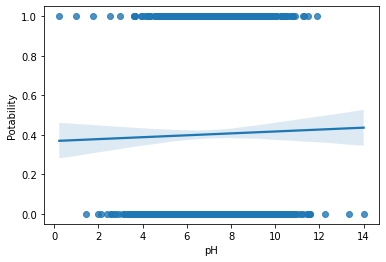

In [4]:
sns.regplot(x = df["pH"], y = df["Potability"])

print("Koefisien korelasi: " + str((df["pH"].corr(df["Potability"]))))

Dari koefisien korelasi yang didapatkan, dapat disimpulkan bahwa korelasi antara pH dan Potability bernilai positif (berbanding lurus) yaitu jika nilai pH meningkat maka nilai Potability juga meningkat. Hubungan korelasi antara pH dan Potability tergolong dalam kategori sangat rendah.

### Hardness

Koefisien korelasi: -0.0014631528959479344


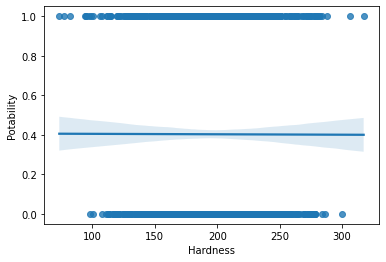

In [23]:
sns.regplot(x = df["Hardness"], y = df["Potability"])

print("Koefisien korelasi: " + str((df["Hardness"].corr(df["Potability"]))))

Dari koefisien korelasi yang didapatkan, dapat disimpulkan bahwa korelasi antara Hardness dan Potability bernilai negatif (berbanding terbalik) yaitu jika nilai Hardnesss meningkat maka nilai Potability menurun. Hubungan korelasi antara Hardness dan Potability tergolong dalam kategori sangat rendah.

### Solids

Koefisien korelasi: 0.03897657818173466


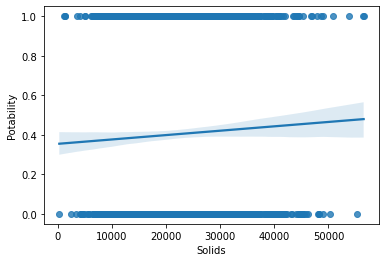

In [25]:
sns.regplot(x = df["Solids"], y = df["Potability"])

print("Koefisien korelasi: " + str((df["Solids"].corr(df["Potability"]))))

Dari koefisien korelasi yang didapatkan, dapat disimpulkan bahwa korelasi antara Solids dan Potability bernilai positif (berbanding lurus) yaitu jika nilai Solids meningkat maka nilai Potability juga meningkat. Hubungan korelasi antara Solids dan Potability tergolong dalam kategori sangat rendah.

### Chloramines

Koefisien korelasi: 0.02077892184052409


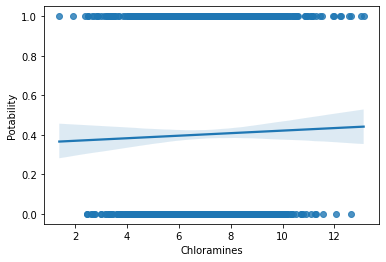

In [26]:
sns.regplot(x = df["Chloramines"], y = df["Potability"])

print("Koefisien korelasi: " + str((df["Chloramines"].corr(df["Potability"]))))

Dari koefisien korelasi yang didapatkan, dapat disimpulkan bahwa korelasi antara Chloramines dan Potability bernilai positif (berbanding lurus) yaitu jika nilai Chloramines meningkat maka nilai Potability juga meningkat. Hubungan korelasi antara Chloramines dan Potability tergolong dalam kategori sangat rendah.

### Sulfate

Koefisien korelasi: -0.015703164419273778


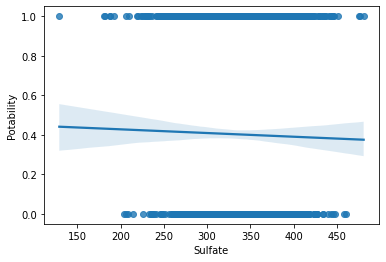

In [27]:
sns.regplot(x = df["Sulfate"], y = df["Potability"])

print("Koefisien korelasi: " + str((df["Sulfate"].corr(df["Potability"]))))

Dari koefisien korelasi yang didapatkan, dapat disimpulkan bahwa korelasi antara Sulfate dan Potability bernilai negatif (berbanding terbalik) yaitu jika nilai Sulfate meningkat maka nilai Potability menurun. Hubungan korelasi antara Sulfate dan Potability tergolong dalam kategori sangat rendah.

### Conductivity

Koefisien korelasi: -0.016257120111377067


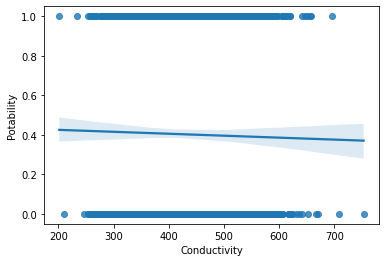

In [28]:
sns.regplot(x = df["Conductivity"], y = df["Potability"])

print("Koefisien korelasi: " + str((df["Conductivity"].corr(df["Potability"]))))

Dari koefisien korelasi yang didapatkan, dapat disimpulkan bahwa korelasi antara Conductivity dan Potability bernilai negatif (berbanding terbalik) yaitu jika nilai Chloramines meningkat maka nilai Potability menurun. Hubungan korelasi antara Chloramines dan Potability tergolong dalam kategori sangat rendah.

### OrganicCarbon

Koefisien korelasi: -0.015488461910747259


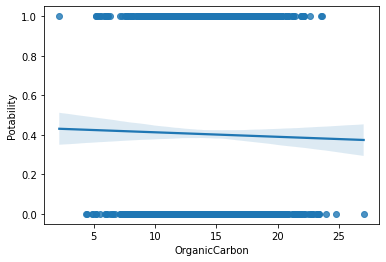

In [29]:
sns.regplot(x = df["OrganicCarbon"], y = df["Potability"])

print("Koefisien korelasi: " + str((df["OrganicCarbon"].corr(df["Potability"]))))

Dari koefisien korelasi yang didapatkan, dapat disimpulkan bahwa korelasi antara OrganicCarbon dan Potability bernilai negatif (berbanding terbalik) yaitu jika nilai OrganicCarbon meningkat maka nilai Potability menurun. Hubungan korelasi antara OrganicCarbon dan Potability tergolong dalam kategori sangat rendah.

### Trihalomethanes

Koefisien korelasi: 0.009236711064712997


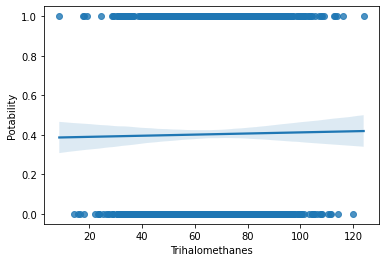

In [30]:
sns.regplot(x = df["Trihalomethanes"], y = df["Potability"])

print("Koefisien korelasi: " + str((df["Trihalomethanes"].corr(df["Potability"]))))

Dari koefisien korelasi yang didapatkan, dapat disimpulkan bahwa korelasi antara Trihalomethanes dan Potability bernilai positif (berbanding lurus) yaitu jika nilai Trihalomethanes meningkat maka nilai Potability juga meningkat. Hubungan korelasi antara Trihalomethanes dan Potability tergolong dalam kategori sangat rendah.

### Turbidity

Koefisien korelasi: 0.022331042640622665


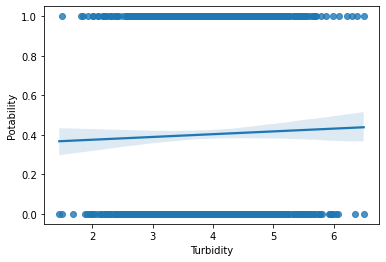

In [31]:
sns.regplot(x = df["Turbidity"], y = df["Potability"])

print("Koefisien korelasi: " + str((df["Turbidity"].corr(df["Potability"]))))

Dari koefisien korelasi yang didapatkan, dapat disimpulkan bahwa korelasi antara Turbidity dan Potability bernilai positif (berbanding lurus) yaitu jika nilai Turbidity meningkat maka nilai Potability juga meningkat. Hubungan korelasi antara Turbidity dan Potability tergolong dalam kategori sangat rendah.